# Comparing 2 Stacks of Catalogues

## Environment: anaconda-2.7 

In [1]:
import sys
print sys.executable
# Hack!, this avoids messing with NERSC's config file for jupyter hub
sys.path.append('/global/homes/k/kaylanb/repos')
sys.path.append('/global/homes/k/kaylanb/repos/astrometry.net')
sys.path.append('/global/homes/k/kaylanb/repos/tractor')
sys.path
print sys.path

/anaconda2/bin/python
['', '/anaconda2/lib/python27.zip', '/anaconda2/lib/python2.7', '/anaconda2/lib/python2.7/plat-linux2', '/anaconda2/lib/python2.7/lib-tk', '/anaconda2/lib/python2.7/lib-old', '/anaconda2/lib/python2.7/lib-dynload', '/global/homes/k/kaylanb/.local/lib/python2.7/site-packages', '/anaconda2/lib/python2.7/site-packages', '/anaconda2/lib/python2.7/site-packages/Sphinx-1.4.1-py2.7.egg', '/anaconda2/lib/python2.7/site-packages/setuptools-23.0.0-py2.7.egg', '/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/global/u2/k/kaylanb/.ipython', '/global/homes/k/kaylanb/repos', '/global/homes/k/kaylanb/repos/astrometry.net', '/global/homes/k/kaylanb/repos/tractor']


## Need more packages?

In [2]:
# Easy if pip, conda installable
#!/anaconda2/bin/pip install ...
#!/anaconda2/bin/conda install ...

# Main()

Run [legacy-zeropoints-qa.py](https://github.com/legacysurvey/legacypipe/blob/57fd01b80ed6af65543a1177798977da45975f3a/py/legacyccds/legacy-zeropoints.py) like this `"python legacy-zeropoints-qa.py"` to analyze everything. 

See below to walk through it step by step.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import fitsio
import glob
import os
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from astropy import units
from astropy.coordinates import SkyCoord

from astrometry.util.fits import fits_table, merge_tables
from tractor.brightness import NanoMaggies


In [3]:
import theValidator.catalogues as cat

# LRGs, ELGs, QSOs, etc

MMT           : 147
SDSSDR7QSO    : 105806
MMTADM_QSO?   : 30
AUS_QSO(BAL)  : 20
2SLAQ_QSO     : 1964
BOSS          : 271345
eBOSS         : 6863
MMTADM_QSO    : 293
AUS_QSO       : 248
TP_QSO        : 3
2SLAQ_QSO(BAL): 34
UVES_HIRES    : 6
rlo=315.00, rhi=45.00, dlo=-1.25, dhi=1.25
corner=1, number bricks=3610
corner=2, number bricks=3610
corner=3, number bricks=3610
corner=4, number bricks=3610
any corner, number bricks=3982
Matched: 92/17054 objects
Wrote /project/projectdirs/desi/users/burleigh/desi/target/analysis/truth/qsoCatalogQSO-dr3matched.fits
Wrote /project/projectdirs/desi/users/burleigh/desi/target/analysis/truth/dr3-qsoCatalogQSOmatched.fits


In [ ]:
import theValidator.catalogues as cat

def big_mem_stack(self,fn_list,textfile=False):
        '''does self.stack() but for the case the Memory will be exceeded'''
        assert(textfile == False)

In [36]:
mat=cat.Matcher()
imatch,imiss,d2d= mat.match_within(dp2,dr3) #,dist=1./3600)
#fits_funcs.set_extra_data(dr3)

Matched: 17952/32878 objects


In [37]:
dp2.cut(imatch['ref'])
dr3.cut(imatch['obs'])

In [42]:
fits_funcs= cat.CatalogueFuncs()
fits_funcs.set_extra_data(dr3)

# R Distribution for Objects we are actualy targeting

In [25]:
import decals_sim_priors 
kwargs=dict(DR=2,savefig=False,alpha=0.2,\
            brick_primary=True,anymask=True,allmask=False,fracflux=True)


# Stars, pure sample is from DR2
star_obj= decals_sim_priors.STAR(DR=2,savefig=False)
stars= star_obj.get_purestars()
# QSOs, DR2 for now, still need build DR3 sample 
kwargs.update(dict(rlimit=22.7+1.)) 
qso_obj= decals_sim_priors.QSO(**kwargs)
qsos= qso_obj.get_qsos()
# DR3 for ELG, LRG
kwargs.update(dict(DR=3))
kwargs.update(dict(rlimit=23.4+1.)) 
elg_obj= decals_sim_priors.ELG(**kwargs)
rz,gr,elg_r= elg_obj.get_elgs_FDR_cuts()
kwargs.update(dict(zlimit=20.46+1.))
lrg_obj= decals_sim_priors.LRG(**kwargs)
lrg_rz,rW1,lrg_r= lrg_obj.get_lrgs_FDR_cuts()




('self.fracflux=', False, 'kwargs= ', {'savefig': False, 'DR': 2})


decals_sim_priors.py:337: RuntimeWarning: divide by zero encountered in divide
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:337: RuntimeWarning: invalid value encountered in divide
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:337: RuntimeWarning: divide by zero encountered in log10
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:337: RuntimeWarning: invalid value encountered in log10
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:338: RuntimeWarning: divide by zero encountered in divide
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:338: RuntimeWarning: invalid value encountered in divide
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:338: RuntimeWarning: divide by zero encountered in log10
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:338: RuntimeWarning: invalid value encountered in log10
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:341: RuntimeWarning

('self.fracflux=', True, 'kwargs= ', {'anymask': True, 'savefig': False, 'rlimit': 23.7, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 2, 'fracflux': True})
('QSOs, self.rlimit= ', 23.7)


decals_sim_priors.py:321: RuntimeWarning: invalid value encountered in less
  cut*= np.all((data.get('decam_fracflux')[:, [1,2,4]] < 0.05),axis=1)


('self.fracflux=', True, 'kwargs= ', {'anymask': True, 'savefig': False, 'rlimit': 24.4, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 3, 'fracflux': True})
('ELGs, self.rlimit= ', 24.4)
('self.fracflux=', True, 'kwargs= ', {'anymask': True, 'savefig': False, 'zlimit': 21.46, 'rlimit': 24.4, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 3, 'fracflux': True})
('LRGs, self.zlimit= ', 21.46)


In [22]:
# elg_r['med2hiz_oiibright'].min(),elg_r['med2hiz_oiibright'].max()
zmag= lrg_r['red_galaxy_hiz']-lrg_rz['red_galaxy_hiz']
zmag.min(),zmag.max()

(18.591583, 21.45821)

In [19]:
np.all((np.arange(10) < 6,\
        np.arange(10) > 3),axis=1)

array([False, False], dtype=bool)

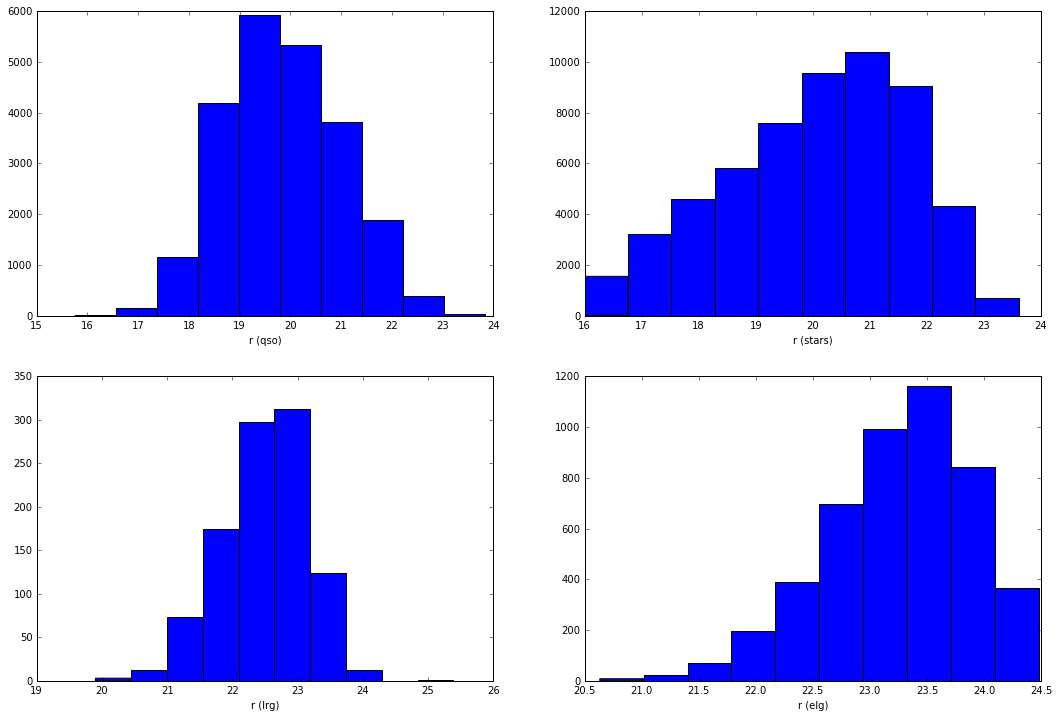

In [26]:
fig,axes = plt.subplots(2,2,figsize=(18,12))
ax=axes.flatten()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
for cnt,typ in zip(range(5),['qso','stars','lrg','elg']):
    if typ == 'qso':
        rmag=qsos.get('decam_mag')[:,2]
        hiz=2.1
        loz= qsos.get('z') <= hiz
        cut= (loz) * (np.isfinite(rmag)) 
        rmag=rmag[cut]
    elif typ == 'stars':
        rmag=stars.get('decam_mag')[:,2]
    elif typ == 'elg':
        rmag= elg_r['med2hiz_oiibright']
    elif typ == 'lrg':
        rmag= lrg_r['red_galaxy_hiz']
    ax[cnt].hist(rmag)
    xlab=ax[cnt].set_xlabel('r (%s)' % typ)
# plt.savefig('rmag_dist.png', \
#             bbox_extra_artists=[xlab], bbox_inches='tight',dpi=150)

# LRG - z > 20.46
# ELG - r < 23.4
# QSO - redshift < 2.1
# STAR - r > 16

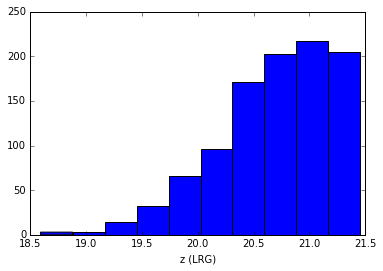

In [27]:
# LRG zmag
zmag= lrg_r['red_galaxy_hiz']-lrg_rz['red_galaxy_hiz']
plt.hist(zmag)
plt.xlabel('z (%s)' % 'LRG')

# QSOs


('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 2, 'fracflux': True})


decals_sim_priors.py:321: RuntimeWarning: invalid value encountered in less
  cut*= np.all((data.get('decam_fracflux')[:, [1,2,4]] < 0.05),axis=1)


('self.fracflux=', False, 'kwargs= ', {'savefig': False, 'DR': 2})


decals_sim_priors.py:337: RuntimeWarning: divide by zero encountered in divide
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:337: RuntimeWarning: invalid value encountered in divide
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:337: RuntimeWarning: divide by zero encountered in log10
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:337: RuntimeWarning: invalid value encountered in log10
  GRCOLOR = 2.5 * np.log10(RFLUX / GFLUX)
decals_sim_priors.py:338: RuntimeWarning: divide by zero encountered in divide
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:338: RuntimeWarning: invalid value encountered in divide
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:338: RuntimeWarning: divide by zero encountered in log10
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:338: RuntimeWarning: invalid value encountered in log10
  RZCOLOR = 2.5 * np.log10(ZFLUX / RFLUX)
decals_sim_priors.py:341: RuntimeWarning

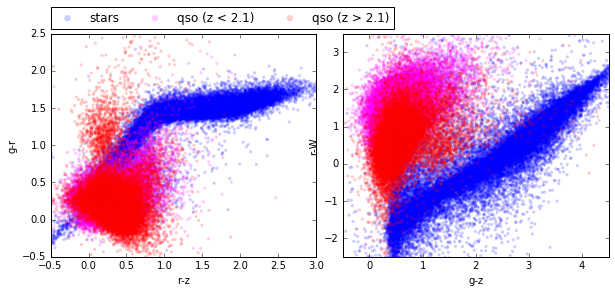

In [116]:
from decals_sim_priors import QSO
kwargs=dict(DR=2,savefig=False,alpha=0.2,\
            brick_primary=True,anymask=True,allmask=False,fracflux=True)
dr2= QSO(**kwargs)
dr2.plot()
kwargs.update(dict(DR=3))
dr2= QSO(**kwargs)
dr2.plot()

('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 2, 'fracflux': True})
('QSOs, self.rlimit= ', 22.7)
('self.fracflux=', False, 'kwargs= ', {'savefig': False, 'DR': 2})
('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 3, 'fracflux': True})
('QSOs, self.rlimit= ', 22.7)


IOError: File not found: '/project/projectdirs/desi/users/burleigh/desi/target/analysis/truth/qso-dr3sweepmatched.fits'

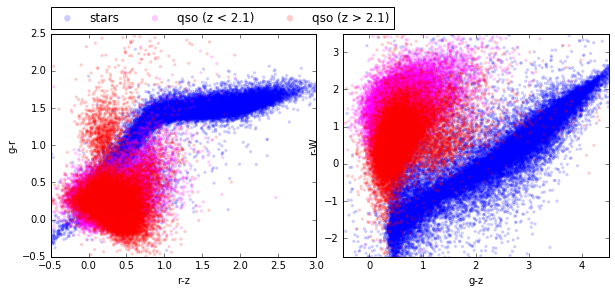

In [28]:
from decals_sim_priors import QSO
kwargs=dict(DR=2,savefig=False,alpha=0.2,\
            brick_primary=True,anymask=True,allmask=False,fracflux=True)
dr2= QSO(**kwargs)
dr2.plot()
kwargs.update(dict(DR=3))
dr2= QSO(**kwargs)
dr2.plot()

# ELG

('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 2, 'fracflux': True})
('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 3, 'fracflux': True})


decals_sim_priors.py:321: RuntimeWarning: invalid value encountered in less
  cut*= np.all((data.get('decam_fracflux')[:, [1,2,4]] < 0.05),axis=1)


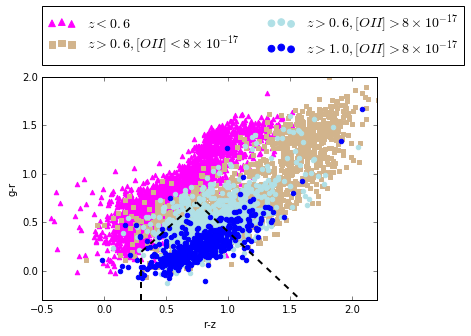

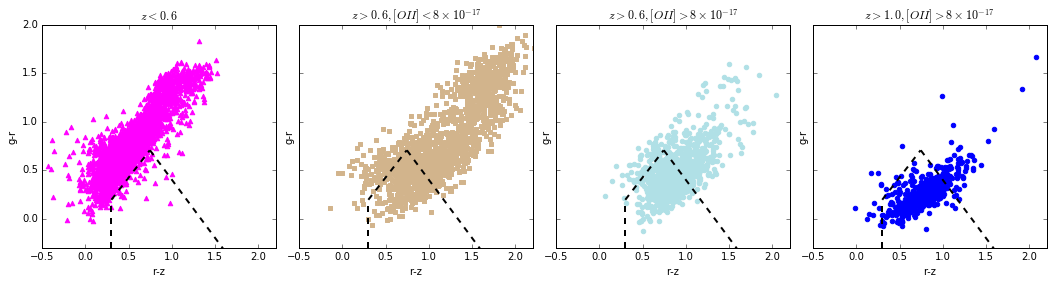

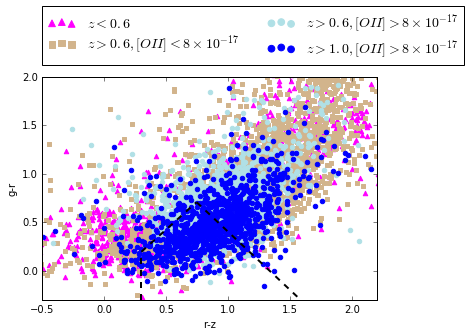

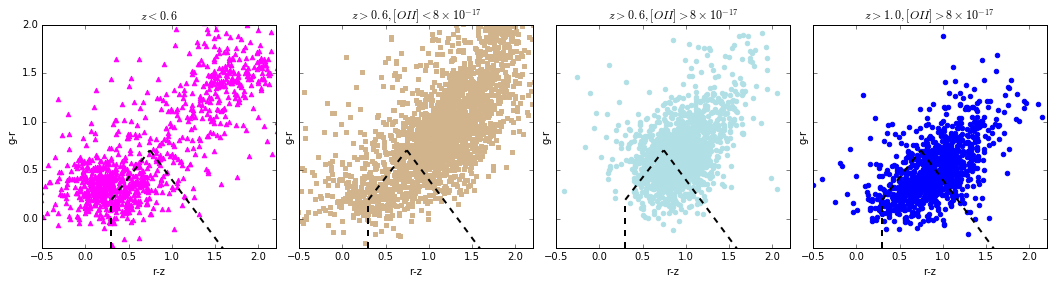

In [24]:
from decals_sim_priors import ELG
kwargs=dict(DR=2,savefig=False,alpha=0.2,\
            brick_primary=True,anymask=True,allmask=False,fracflux=True)
elg= ELG(**kwargs)
elg.plot()
kwargs.update(dict(DR=3))
elg= ELG(**kwargs)
elg.plot()

# LRG

('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 2, 'fracflux': True})


decals_sim_priors.py:493: RuntimeWarning: invalid value encountered in divide
  b= cuts['oiibright_loz']
decals_sim_priors.py:494: RuntimeWarning: invalid value encountered in divide
  ax.scatter(Xall[:,0][b],Xall[:,1][b], marker='o', color='powderblue',
decals_sim_priors.py:498: RuntimeWarning: invalid value encountered in greater
  ax.scatter(Xall[:,0][b],Xall[:,1][b], marker='o', color='blue',
decals_sim_priors.py:499: RuntimeWarning: invalid value encountered in greater
  label=r'$z>1.0, [OII]>8\times10^{-17}$')
decals_sim_priors.py:321: RuntimeWarning: invalid value encountered in less
  cut*= np.all((data.get('decam_fracflux')[:, [1,2,4]] < 0.05),axis=1)
decals_sim_priors.py:524: RuntimeWarning: invalid value encountered in divide
  [r'$z<0.6$',r'$z>0.6, [OII]<8\times10^{-17}$',r'$z>0.6, [OII]>8\times10^{-17}$',r'$z>1.0, [OII]>8\times10^{-17}$']):
decals_sim_priors.py:598: RuntimeWarning: invalid value encountered in divide
  for key in ['star','red_galaxy_lowz','red_galaxy_hiz',

('self.fracflux=', True, 'kwargs= ', {'savefig': False, 'anymask': True, 'brick_primary': True, 'alpha': 0.2, 'allmask': False, 'DR': 3, 'fracflux': True})


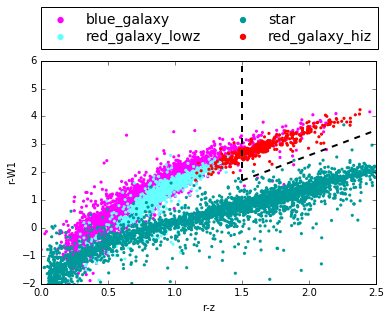

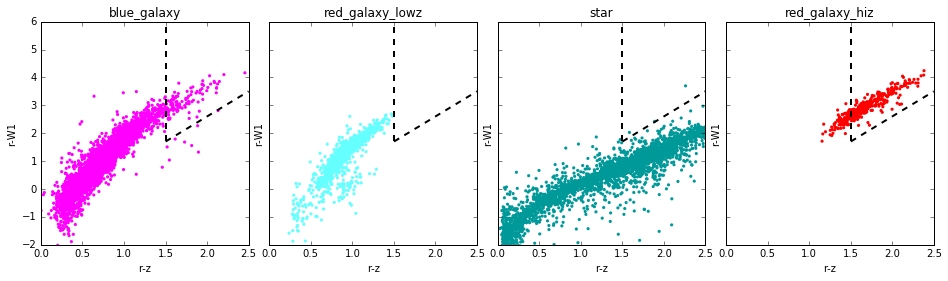

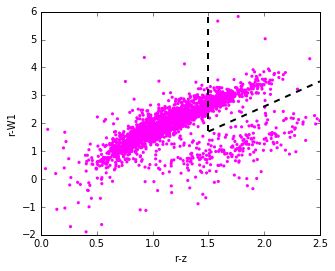

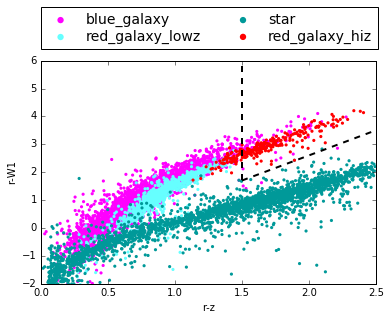

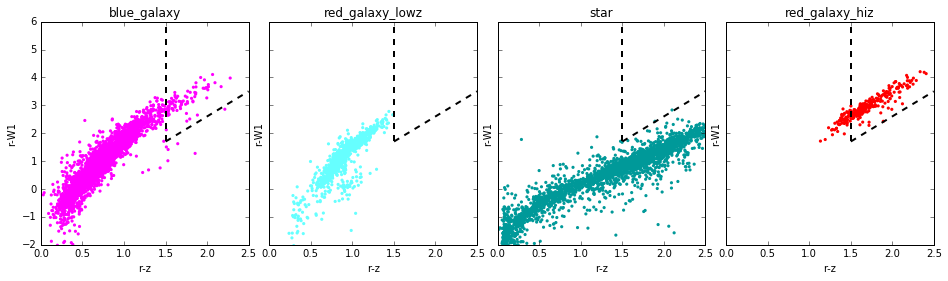

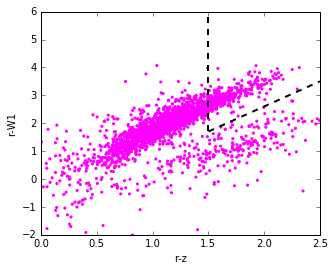

In [29]:
import decals_sim_priors
kwargs=dict(DR=2,savefig=False,alpha=0.2,\
            brick_primary=True,anymask=True,allmask=False,fracflux=True)
lrg= decals_sim_priors.LRG(**kwargs)
lrg.plot()
kwargs.update(dict(DR=3))
lrg= decals_sim_priors.LRG(**kwargs)
lrg.plot()

In [ ]:
import theValidator.catalogues as cat
tt= cat.TargetTruth()
tt.qso()